## Beam caustics with tilted lenses

created: **28/08/2022**; last edited: **28/08/2022**

[rafael.celestre@esrf.eu](mailto:rafael.celestre@esrf.eu)

<hr style="border:1px solid gray">

In [1]:
# imports

# checking we are using the correct python:
import sys
print(sys.executable)
print(sys.version)
sys.path.insert(0, '../../pylibs/')

%matplotlib notebook

import barc4plots.barc4plots as b4pt         # get barc4plots: https://gitlab.esrf.fr/celestre/barc4plots
import utils as uti

from glob import glob
import numpy as np  
import h5py as h5
import hdf5plugin

from scipy.ndimage import center_of_mass
from scipy.interpolate import interp1d

/home/esrf/celestre/miniconda/envs/xog/bin/python
3.8.12 (default, Oct 12 2021, 13:49:34) 
[GCC 7.5.0]


In [2]:
# x-ray lens parameters in meters

beamE = 11.103          # in keV - (K 1s Ge)
pix_size = 0.635/2  # in um - x 20 mag
dpi = 250   # for plots
z = np.linspace(1160,1560,201)*1e-3 # scan in [m]
x = np.linspace(0.17,0.47,201)*1e-3 # scan in [m]
y = np.linspace(-1024, 1024, 2048)*pix_size
root_folder = '/data/bm05/inhouse/xog-refropt/220824lenses/'

In [1]:
def load_files(fldr, fext, adir):
    caustic_list = sorted(glob(fldr+'*.'+fext))
    k = 0
    for hf_file in caustic_list:
        f = h5.File(hf_file, 'r')
        data_set = f['entry_0000']['measurement']['data'][()]
        if k == 0:
            sample = np.mean(data_set, axis=adir+1, dtype=float)
        else:
            sample = np.append(sample, np.mean(data_set, axis=adir+1, dtype=float), 0)
        k += 1
    return sample

In [2]:
scur_14_max = 69.66
scur_13_max = 72.46
scur_12p1_00 = 74.08
scur_12p1_60 = 63.16
scur_12p1_62 = 73.04

### Focusing with N + 1 = 14 lenses

In [3]:
data_set = load_files(root_folder+'caustic_N14/scans/', 'h5', 1)/scur_14_max
cen = np.zeros(data_set.shape[0])
fwhm_n14 = np.zeros(data_set.shape[0])
for line in range(data_set.shape[0]):
    fwhm_n14[line] = uti.fwhm(data_set[line, :], y)*pix_size
    cen[line] = (1024 - center_of_mass(data_set[line, :])[0])*pix_size
    large_f = np.pad(data_set[line, :], [2048, 2048], mode='constant',constant_values=0)
    large_y = np.linspace(-len(large_f)/2, len(large_f)/2, len(large_f))*pix_size
    f = interp1d(large_y, large_f)
    data_set[line, :] = f(y-1.52*cen[line])
max_coords = np.unravel_index(data_set.argmax(),data_set.shape)
cut_n14 = data_set[max_coords[0], :]

NameError: name 'root_folder' is not defined

>>>> file 2D_caustics_n14.png saved to disk.


<IPython.core.display.Javascript object>


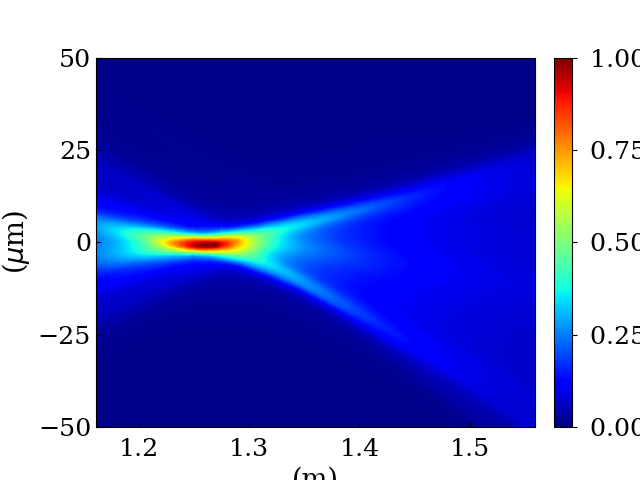

In [6]:
# beam caustics
m = np.amax(data_set)
image = b4pt.Image2Plot(np.transpose(data_set)/m, z, y-1)
image.legends = ['', '(m)', '($\mu$m)']
image.Colorbar = True
image.LaTex = True
image.AspectRatio = False
image.ColorScheme = 5
image.plt_limits = [0, 1.]
image.ax_limits = [1.161, 1.559, -50, 50]
image.FontsSizeScale = 1.3
image.sort_class()
b4pt.plot_2D(image, './results/2D_caustics_n14.png',Enable=True, Silent=False, dpi=dpi)

### Focusing with N = 13 lenses

In [9]:
data_set = load_files(root_folder+'caustic_N13/scans/', 'h5', 1)/scur_13_max
cen = np.zeros(data_set.shape[0])
fwhm_n13 = np.zeros(data_set.shape[0])

for line in range(data_set.shape[0]):
    fwhm_n13[line] = uti.fwhm(data_set[line, :], y)*pix_size
    cen[line] = (1024 - center_of_mass(data_set[line, :])[0])*pix_size
    large_f = np.pad(data_set[line, :], [512, 512], mode='constant',constant_values=0)
    large_y = np.linspace(-len(large_f)/2, len(large_f)/2, len(large_f))*pix_size
    f = interp1d(large_y, large_f)
    data_set[line, :] = f(y-1.7*cen[line])
max_coords = np.unravel_index(data_set.argmax(),data_set.shape)
cut_n13 = data_set[max_coords[0], :]

>>>> file 2D_caustics_n13.png saved to disk.


<IPython.core.display.Javascript object>


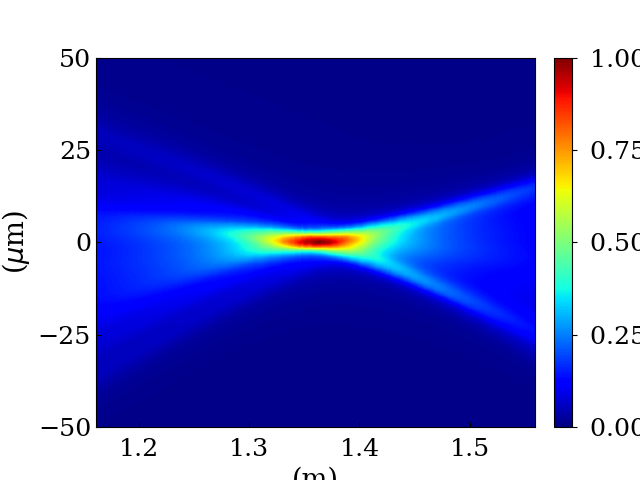

In [10]:
# beam caustics
m = np.amax(data_set)
image = b4pt.Image2Plot(np.transpose(data_set)/m, z, y+7)
image.legends = ['', '(m)', '($\mu$m)']
image.Colorbar = True
image.LaTex = True
image.AspectRatio = False
image.ColorScheme = 5
image.plt_limits = [0, 1.]
image.ax_limits = [1.161, 1.559, -50, 50]
image.FontsSizeScale = 1.3
image.sort_class()
b4pt.plot_2D(image, './results/2D_caustics_n13.png',Enable=True, Silent=False, dpi=dpi)

### Focusing with N = 12 + 1 lenses @ $0^\circ$

In [14]:
data_set = load_files(root_folder+'/caustic_N12_N1th0/scans/', 'h5', 1)/scur_12p1_00
cen = np.zeros(data_set.shape[0])
fwhm_n12p1_00 = np.zeros(data_set.shape[0])

for line in range(data_set.shape[0]):
    fwhm_n12p1_00[line] = uti.fwhm(data_set[line, :], y)*pix_size
    cen[line] = (1024 - center_of_mass(data_set[line, :])[0])*pix_size
    large_f = np.pad(data_set[line, :], [512, 512], mode='constant',constant_values=0)
    large_y = np.linspace(-len(large_f)/2, len(large_f)/2, len(large_f))*pix_size
    f = interp1d(large_y, large_f)
    data_set[line, :] = f(y-1.7*cen[line])
max_coords = np.unravel_index(data_set.argmax(),data_set.shape)
cut_n12p1_00 = data_set[max_coords[0], :]

>>>> file 2D_caustics_n12p1_00.png saved to disk.


<IPython.core.display.Javascript object>


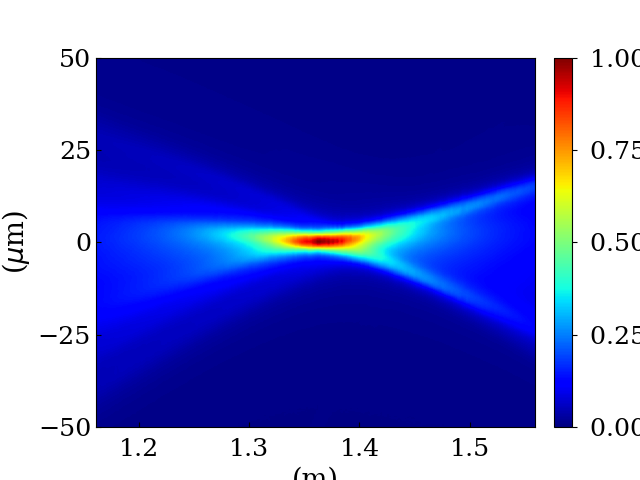

In [15]:
# beam caustics
m = np.amax(data_set)
image = b4pt.Image2Plot(np.transpose(data_set)/m, z, y+7.3)
image.legends = ['', '(m)', '($\mu$m)']
image.Colorbar = True
image.LaTex = True
image.AspectRatio = False
image.ColorScheme = 5
image.plt_limits = [0, 1.]
image.ax_limits = [1.161, 1.559, -50, 50]
image.FontsSizeScale = 1.3
image.sort_class()
b4pt.plot_2D(image, './results/2D_caustics_n12p1_00.png',Enable=True, Silent=False, dpi=dpi)

### Focusing with N = 12 + 1 lenses @ $60^\circ$

In [20]:
data_set = load_files(root_folder+'/caustic_N12_N1th60/scans/', 'h5', 1)/scur_12p1_60
cen = np.zeros(data_set.shape[0])
fwhm_n12p1_60 = np.zeros(data_set.shape[0])

for line in range(data_set.shape[0]):
    fwhm_n12p1_60[line] = uti.fwhm(data_set[line, :], y)*pix_size
    cen[line] = (1024 - center_of_mass(data_set[line, :])[0])*pix_size
    large_f = np.pad(data_set[line, :], [512, 512], mode='constant',constant_values=0)
    large_y = np.linspace(-len(large_f)/2, len(large_f)/2, len(large_f))*pix_size
    f = interp1d(large_y, large_f)
    data_set[line, :] = f(y-1.7*cen[line])
max_coords = np.unravel_index(data_set.argmax(),data_set.shape)
cut_n12p1_60 = data_set[max_coords[0], :]

>>>> file 2D_caustics_n12p1_60.png saved to disk.


<IPython.core.display.Javascript object>


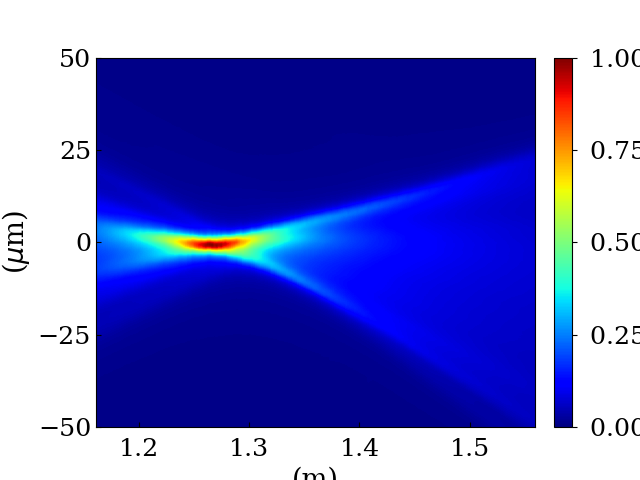

In [21]:
# beam caustics
m = np.amax(data_set)
image = b4pt.Image2Plot(np.transpose(data_set)/m, z, y)
image.legends = ['', '(m)', '($\mu$m)']
image.Colorbar = True
image.LaTex = True
image.AspectRatio = False
image.ColorScheme = 5
image.plt_limits = [0, 1.]
image.ax_limits = [1.161, 1.559, -50, 50]
image.FontsSizeScale = 1.3
image.sort_class()
b4pt.plot_2D(image, './results/2D_caustics_n12p1_60.png',Enable=True, Silent=False, dpi=dpi)

### Focusing with N = 12 + 1 lenses @ $62^\circ$

In [18]:
data_set = load_files(root_folder+'/caustic_N12_N1th62/scans/', 'h5', 1)/scur_12p1_62
cen = np.zeros(data_set.shape[0])
fwhm_n12p1_60 = np.zeros(data_set.shape[0])

for line in range(data_set.shape[0]):
    fwhm_n12p1_60[line] = uti.fwhm(data_set[line, :], y)*pix_size
    cen[line] = (1024 - center_of_mass(data_set[line, :])[0])*pix_size
    large_f = np.pad(data_set[line, :], [512, 512], mode='constant',constant_values=0)
    large_y = np.linspace(-len(large_f)/2, len(large_f)/2, len(large_f))*pix_size
    f = interp1d(large_y, large_f)
    data_set[line, :] = f(y-1.7*cen[line])
max_coords = np.unravel_index(data_set.argmax(),data_set.shape)
cut_n12p1_62 = data_set[max_coords[0], :]
print(max_coords[0])

48


>>>> file 2D_caustics_n12p1_62.png saved to disk.


<IPython.core.display.Javascript object>


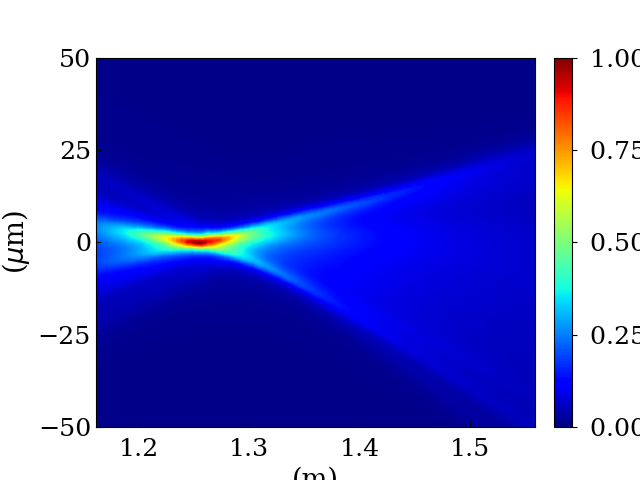

In [19]:
# beam caustics
m = np.amax(data_set)
image = b4pt.Image2Plot(np.transpose(data_set)/m, z, y)
image.legends = ['', '(m)', '($\mu$m)']
image.Colorbar = True
image.LaTex = True
image.AspectRatio = False
image.ColorScheme = 5
image.plt_limits = [0, 1.]
image.ax_limits = [1.161, 1.559, -50, 50]
image.FontsSizeScale = 1.3
image.sort_class()
b4pt.plot_2D(image, './results/2D_caustics_n12p1_62.png',Enable=True, Silent=False, dpi=dpi)

### Focal spot comparison

>>>> file N13_focalspot saved to disk.


<IPython.core.display.Javascript object>


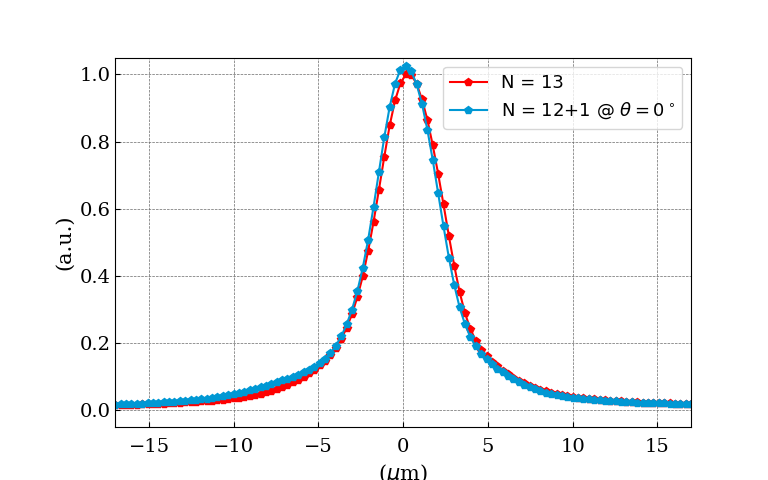

N=13: 5.625 um
N=12+1 @ 0 deg: 5.386 um
Error: 4.25 pp


In [22]:
# N = 13 && N = 12+1
m = np.amax(cut_n13)
image = b4pt.Image2Plot(cut_n13/m, y+(1024-np.argmax(cut_n13))*pix_size)
image.AspectRatio = False
image.LaTex = True
image.LineStyle = 'p-'
image.ax_limits = [-17, 17, -0.05, 1.05]
image.grid = True
image.alpha = 1.0
image.sort_class()
image.label = 'N = 13'
image.ColorScheme = -2 
b4pt.plot_1D(image, Enable=False, Hold=False)#, m=10, n=2)
# image.ColorScheme = -2
# image.label = None
# image.FillBetween = True
# image.alpha = 0.1
# b4pt.plot_1D(image, Enable=False, Hold=True)
image.alpha = 1
image = b4pt.Image2Plot(cut_n12p1_00/m, y+(1024-np.argmax(cut_n12p1_00))*pix_size)
image.label = 'N = 12+1 @ $\\theta=0^\circ$'
image.LineStyle = 'p-'
image.ColorScheme = 4 
image.LabelPos = 1
image.legends = ['', '($\mu$m)', '(a.u.)']
# b4pt.plot_1D(image, Enable=False, Hold=True)
# image.label = None
# image.FillBetween = True
# image.alpha = 0.1
b4pt.plot_1D(image, './results/N13_focalspot',Enable=True, Hold=True, dpi=dpi)

fw1 = uti.fwhm(cut_n13, y)
fw2=uti.fwhm(cut_n12p1_00, y)

err= 100*(fw1-fw2)/fw1
print('N=13: %.3f um'%fw1)
print('N=12+1 @ 0 deg: %.3f um'%fw2)
print('Error: %.2f pp'%err)

>>>> file N14_focalspot saved to disk.


<IPython.core.display.Javascript object>


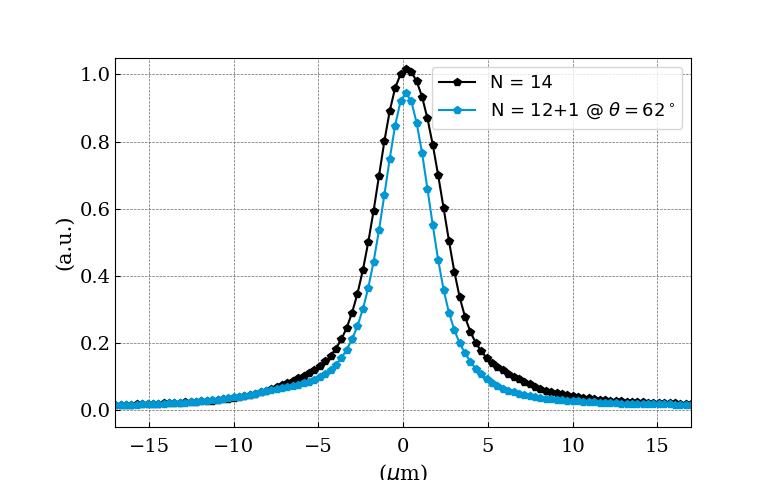

0.9449289243744203
N=14: 5.374 um
N=12+1 @ 62 deg: 4.346 um
Error: 19.13 pp


In [23]:
# N = 14 && N = 12+1 @60

image = b4pt.Image2Plot(cut_n14/m, y+(1024-np.argmax(cut_n14))*pix_size)
image.AspectRatio = False
image.LaTex = True
image.LineStyle = 'p-'
image.ax_limits = [-17, 17, -0.05, 1.05]
image.grid = True
image.alpha = 1.0
image.sort_class()
image.label = 'N = 14'
image.ColorScheme = -1 
b4pt.plot_1D(image, Enable=False, Hold=False)#, m=10, n=2)
# image.ColorScheme = -1
# image.label = None
# image.FillBetween = True
# image.alpha = 0.1
# b4pt.plot_1D(image, Enable=False, Hold=True)
image.alpha = 1
image = b4pt.Image2Plot(cut_n12p1_62/m, y+(1024-np.argmax(cut_n12p1_62))*pix_size)
image.label = 'N = 12+1 @ $\\theta=62^\circ$'
image.LineStyle = 'p-'
image.ColorScheme = 4 
image.LabelPos = 1
image.legends = ['', '($\mu$m)', '(a.u.)']
# b4pt.plot_1D(image, Enable=False, Hold=True)
# image.label = None
# image.FillBetween = True
# image.alpha = 0.1
b4pt.plot_1D(image, './results/N14_focalspot',Enable=True, Hold=True, dpi=dpi)

print(np.amax(cut_n12p1_62/m))

fw1 = uti.fwhm(cut_n14, y)
fw2=uti.fwhm(cut_n12p1_62, y)

err= 100*(fw1-fw2)/fw1
print('N=14: %.3f um'%fw1)
print('N=12+1 @ 62 deg: %.3f um'%fw2)
print('Error: %.2f pp'%err)

### Focusing with N = 12 + 1 lenses @ angle scan

In [24]:
# Focusing with N = 12 + 1 lenses @ $10^\circ$
data_set = load_files(root_folder+'/caustic_N12_N1th10/scans/', 'h5', 1)
fwhm_n12p1_10 = np.zeros(data_set.shape[0])

for line in range(data_set.shape[0]):
    fwhm_n12p1_10[line] = uti.fwhm(data_set[line, :], y)*pix_size

In [25]:
# Focusing with N = 12 + 1 lenses @ $20^\circ$
data_set = load_files(root_folder+'/caustic_N12_N1th20/scans/', 'h5', 1)
fwhm_n12p1_20 = np.zeros(data_set.shape[0])

for line in range(data_set.shape[0]):
    fwhm_n12p1_20[line] = uti.fwhm(data_set[line, :], y)*pix_size

In [26]:
# Focusing with N = 12 + 1 lenses @ $30^\circ$
data_set = load_files(root_folder+'/caustic_N12_N1th30_bis/scans/', 'h5', 1)
fwhm_n12p1_30 = np.zeros(data_set.shape[0])

for line in range(data_set.shape[0]):
    fwhm_n12p1_30[line] = uti.fwhm(data_set[line, :], y)*pix_size

In [27]:
# Focusing with N = 12 + 1 lenses @ $40^\circ$
data_set = load_files(root_folder+'/caustic_N12_N1th40_bis/scans/', 'h5', 1)
fwhm_n12p1_40 = np.zeros(data_set.shape[0])

for line in range(data_set.shape[0]):
    fwhm_n12p1_40[line] = uti.fwhm(data_set[line, :], y)*pix_size

In [28]:
# Focusing with N = 12 + 1 lenses @ $50^\circ$
data_set = load_files(root_folder+'/caustic_N12_N1th50_bis/scans/', 'h5', 1)
fwhm_n12p1_50 = np.zeros(data_set.shape[0])

for line in range(data_set.shape[0]):
    fwhm_n12p1_50[line] = uti.fwhm(data_set[line, :], y)*pix_size

In [29]:
# Focusing with N = 12 + 1 lenses @ $62^\circ$
data_set = load_files(root_folder+'/caustic_N12_N1th62_bis/align_scans/', 'h5', 1)
fwhm_n12p1_62 = np.zeros(data_set.shape[0])

for line in range(data_set.shape[0]):
    fwhm_n12p1_62[line] = uti.fwhm(data_set[line, :], y)*pix_size

In [30]:
# Focusing with N = 12 + 1 lenses @ $63^\circ$
data_set = load_files(root_folder+'/caustic_N12_N1th63/align_scans/', 'h5', 1)
fwhm_n12p1_63 = np.zeros(data_set.shape[0])

for line in range(data_set.shape[0]):
    fwhm_n12p1_63[line] = uti.fwhm(data_set[line, :], y)*pix_size

In [31]:
# Focusing with N = 12 + 1 lenses @ $65^\circ$
data_set = load_files(root_folder+'/caustic_N12_N1th65/align_scans/', 'h5', 1)
fwhm_n12p1_65 = np.zeros(data_set.shape[0])

for line in range(data_set.shape[0]):
    fwhm_n12p1_65[line] = uti.fwhm(data_set[line, :], y)*pix_size

### Caustic plots

In [32]:
alpha = 1
graph_limits = [1.150, 1.60, 0, 15]
cor = 4 

>>>> file 1D_caustics_limits_bis.png saved to disk.


<IPython.core.display.Javascript object>


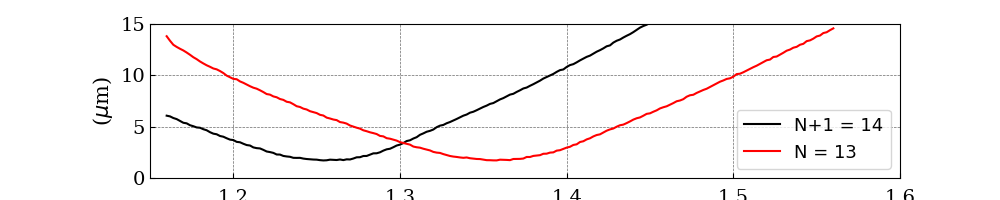

In [33]:
# N and N+1 cautics

image = b4pt.Image2Plot(fwhm_n14, z)
image.AspectRatio = False
image.LaTex = True
image.LineStyle = '-'
image.ax_limits = graph_limits
image.grid = True
image.alpha = 1.0
image.sort_class()
image.label = 'N+1 = 14'
image.ColorScheme = -1 
b4pt.plot_1D(image, Enable=False, Hold=False, m=10, n=2)
image = b4pt.Image2Plot(fwhm_n13, z)
image.label = 'N = 13'
image.ColorScheme = -2 
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, './results/1D_caustics_limits_bis.png',Enable=True, Hold=True, dpi=dpi)

>>>> file 1D_caustics_n12p1_00.png saved to disk.


<IPython.core.display.Javascript object>


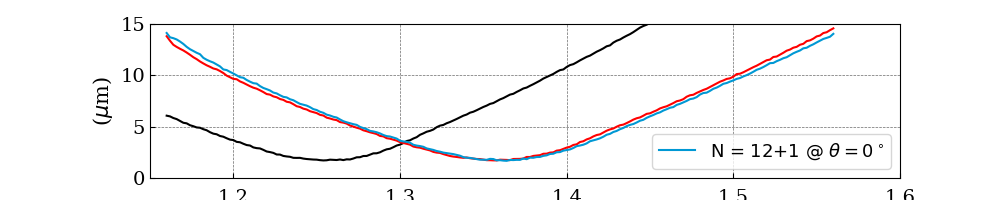

In [35]:
image = b4pt.Image2Plot(fwhm_n14, z)
image.AspectRatio = False
image.LaTex = True
image.LineStyle = '-'
image.ax_limits = graph_limits
image.grid = True
image.alpha = alpha
# image.label = 'N+1 = 14'
image.ColorScheme = -1 
b4pt.plot_1D(image, Enable=False, Hold=False, m=10, n=2)
image = b4pt.Image2Plot(fwhm_n13, z)
image.alpha = alpha
# image.label = 'N = 13'
image.ColorScheme = -2 
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, Enable=False, Hold=True, dpi=dpi)
image = b4pt.Image2Plot(fwhm_n12p1_00, z)
image.alpha = 1
image.label = 'N = 12+1 @ $\\theta=0^\circ$'
image.ColorScheme = cor
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, './results/1D_caustics_n12p1_00.png',Enable=True, Hold=True, dpi=dpi)

>>>> file 1D_caustics_n12p1_10.png saved to disk.


<IPython.core.display.Javascript object>


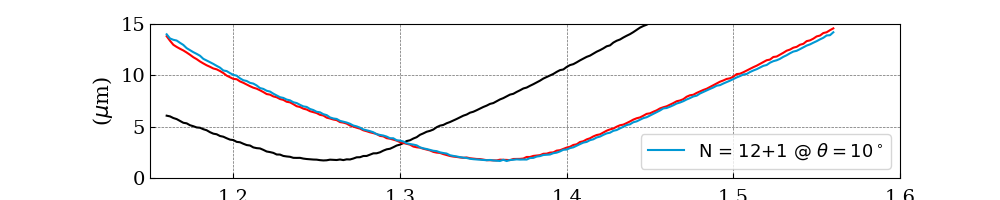

In [37]:
image = b4pt.Image2Plot(fwhm_n14, z)
image.AspectRatio = False
image.LaTex = True
image.LineStyle = '-'
image.ax_limits = graph_limits
image.grid = True
image.alpha = alpha
# image.label = 'N+1 = 14'
image.ColorScheme = -1 
b4pt.plot_1D(image, Enable=False, Hold=False, m=10, n=2)
image = b4pt.Image2Plot(fwhm_n13, z)
image.alpha = alpha
# image.label = 'N = 13'
image.ColorScheme = -2 
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, Enable=False, Hold=True, dpi=dpi)
image = b4pt.Image2Plot(fwhm_n12p1_10, z)
image.alpha = 1
image.label = 'N = 12+1 @ $\\theta=10^\circ$'
image.ColorScheme = cor
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, './results/1D_caustics_n12p1_10.png',Enable=True, Hold=True, dpi=dpi)

>>>> file 1D_caustics_n12p1_20.png saved to disk.


<IPython.core.display.Javascript object>


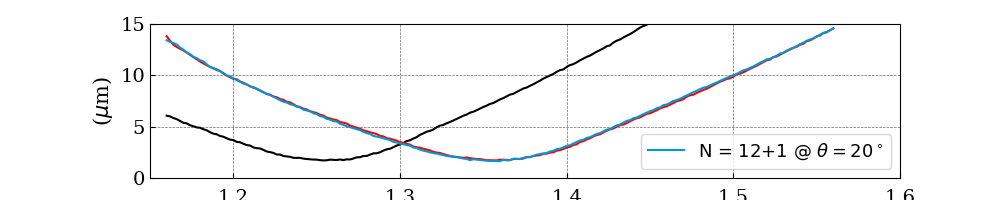

In [38]:
image = b4pt.Image2Plot(fwhm_n14, z)
image.AspectRatio = False
image.LaTex = True
image.LineStyle = '-'
image.ax_limits = graph_limits
image.grid = True
image.alpha = alpha
# image.label = 'N+1 = 14'
image.ColorScheme = -1 
b4pt.plot_1D(image, Enable=False, Hold=False, m=10, n=2)
image = b4pt.Image2Plot(fwhm_n13, z)
image.alpha = alpha
# image.label = 'N = 13'
image.ColorScheme = -2 
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, Enable=False, Hold=True, dpi=dpi)
image = b4pt.Image2Plot(fwhm_n12p1_20, z)
image.alpha = 1
image.label = 'N = 12+1 @ $\\theta=20^\circ$'
image.ColorScheme = cor
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, './results/1D_caustics_n12p1_20.png',Enable=True, Hold=True, dpi=dpi)

In [39]:
image = b4pt.Image2Plot(fwhm_n14, z)
image.AspectRatio = False
image.LaTex = True
image.LineStyle = '-'
image.ax_limits = graph_limits
image.grid = True
image.alpha = alpha
# image.label = 'N+1 = 14'
image.ColorScheme = -1 
b4pt.plot_1D(image, Enable=False, Hold=False, m=10, n=2)
image = b4pt.Image2Plot(fwhm_n13, z)
image.alpha = alpha
# image.label = 'N = 13'
image.ColorScheme = -2 
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, Enable=False, Hold=True, dpi=dpi)
image = b4pt.Image2Plot(fwhm_n12p1_30, z)
image.alpha = 1
image.label = 'N = 12+1 @ $\\theta=30^\circ$'
image.ColorScheme = cor
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, './results/1D_caustics_n12p1_30.png',Enable=True, Hold=True, dpi=dpi)

>>>> file 1D_caustics_n12p1_30.png saved to disk.


<IPython.core.display.Javascript object>

In [41]:
image = b4pt.Image2Plot(fwhm_n14, z)
image.AspectRatio = False
image.LaTex = True
image.LineStyle = '-'
image.ax_limits = graph_limits
image.grid = True
image.alpha = alpha
# image.label = 'N+1 = 14'
image.ColorScheme = -1 
b4pt.plot_1D(image, Enable=False, Hold=False, m=10, n=2)
image = b4pt.Image2Plot(fwhm_n13, z)
image.alpha = alpha
# image.label = 'N = 13'
image.ColorScheme = -2 
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, Enable=False, Hold=True, dpi=dpi)
image = b4pt.Image2Plot(fwhm_n12p1_40, z)
image.alpha = 1
image.label = 'N = 12+1 @ $\\theta=40^\circ$'
image.ColorScheme = cor
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, './results/1D_caustics_n12p1_40.png',Enable=True, Hold=True, dpi=dpi)

>>>> file 1D_caustics_n12p1_40.png saved to disk.


<IPython.core.display.Javascript object>

>>>> file 1D_caustics_n12p1_50.png saved to disk.


<IPython.core.display.Javascript object>


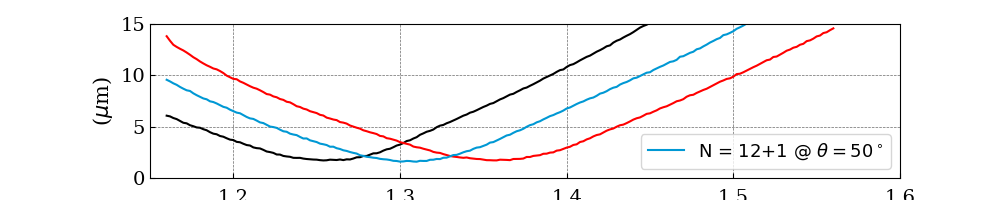

In [42]:
image = b4pt.Image2Plot(fwhm_n14, z)
image.AspectRatio = False
image.LaTex = True
image.LineStyle = '-'
image.ax_limits = graph_limits
image.grid = True
image.alpha = alpha
# image.label = 'N+1 = 14'
image.ColorScheme = -1 
b4pt.plot_1D(image, Enable=False, Hold=False, m=10, n=2)
image = b4pt.Image2Plot(fwhm_n13, z)
image.alpha = alpha
# image.label = 'N = 13'
image.ColorScheme = -2 
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, Enable=False, Hold=True, dpi=dpi)
image = b4pt.Image2Plot(fwhm_n12p1_50, z)
image.alpha = 1
image.label = 'N = 12+1 @ $\\theta=50^\circ$'
image.ColorScheme = cor
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, './results/1D_caustics_n12p1_50.png',Enable=True, Hold=True, dpi=dpi)

In [43]:
image = b4pt.Image2Plot(fwhm_n14, z)
image.AspectRatio = False
image.LaTex = True
image.LineStyle = '-'
image.ax_limits = graph_limits
image.grid = True
image.alpha = alpha
# image.label = 'N+1 = 14'
image.ColorScheme = -1 
b4pt.plot_1D(image, Enable=False, Hold=False, m=10, n=2)
image = b4pt.Image2Plot(fwhm_n13, z)
image.alpha = alpha
# image.label = 'N = 13'
image.ColorScheme = -2 
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, Enable=False, Hold=True, dpi=dpi)
image = b4pt.Image2Plot(fwhm_n12p1_60, z)
image.alpha = 1
image.label = 'N = 12+1 @ $\\theta=60^\circ$'
image.ColorScheme = cor
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, './results/1D_caustics_n12p1_60.png',Enable=True, Hold=True, dpi=dpi)

>>>> file 1D_caustics_n12p1_60.png saved to disk.


<IPython.core.display.Javascript object>

In [44]:
image = b4pt.Image2Plot(fwhm_n14, z)
image.AspectRatio = False
image.LaTex = True
image.LineStyle = '-'
image.ax_limits = graph_limits
image.grid = True
image.alpha = alpha
# image.label = 'N+1 = 14'
image.ColorScheme = -1 
b4pt.plot_1D(image, Enable=False, Hold=False, m=10, n=2)
image = b4pt.Image2Plot(fwhm_n13, z)
image.alpha = alpha
# image.label = 'N = 13'
image.ColorScheme = -2 
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, Enable=False, Hold=True, dpi=dpi)
image = b4pt.Image2Plot(fwhm_n12p1_62, z)
image.alpha = 1
image.label = 'N = 12+1 @ $\\theta=62^\circ$'
image.ColorScheme = cor
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, './results/1D_caustics_n12p1_62.png',Enable=True, Hold=True, dpi=dpi)

>>>> file 1D_caustics_n12p1_62.png saved to disk.


<IPython.core.display.Javascript object>

>>>> file 1D_caustics_n12p1_65.png saved to disk.


<IPython.core.display.Javascript object>


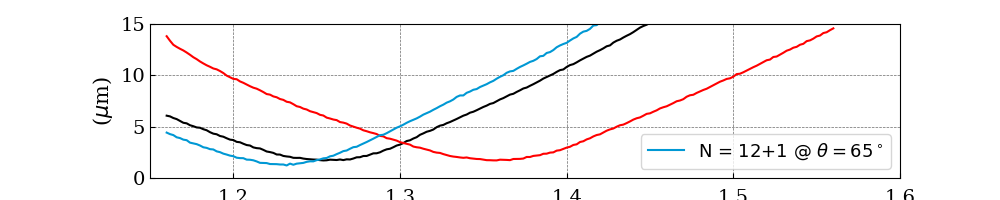

In [45]:
image = b4pt.Image2Plot(fwhm_n14, z)
image.AspectRatio = False
image.LaTex = True
image.LineStyle = '-'
image.ax_limits = graph_limits
image.grid = True
image.alpha = alpha
# image.label = 'N+1 = 14'
image.ColorScheme = -1 
b4pt.plot_1D(image, Enable=False, Hold=False, m=10, n=2)
image = b4pt.Image2Plot(fwhm_n13, z)
image.alpha = alpha
# image.label = 'N = 13'
image.ColorScheme = -2 
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, Enable=False, Hold=True, dpi=dpi)
image = b4pt.Image2Plot(fwhm_n12p1_65, z)
image.alpha = 1
image.label = 'N = 12+1 @ $\\theta=65^\circ$'
image.ColorScheme = cor
image.LabelPos = 4
image.legends = ['', '(m)', '($\mu$m)']
b4pt.plot_1D(image, './results/1D_caustics_n12p1_65.png',Enable=True, Hold=True, dpi=dpi)